### OCR with Pyhton and Tesseract

#### Import the Libraries

In [1]:
import pytesseract
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# indicate where the tesseract engine is being installed
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

#### Reading the Image

In [3]:
img = cv2.imread("data/images/test01.jpg")

#### Show the image

In [4]:
cv2.imshow("Test Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# Another way to Display Image
#from IPython.display import cv2_imshow (Its some Discussion)

In [6]:
# Default color is BGR, So its needs to Inverse the Image to BGR to RGB
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.imshow("BGR TO RGB", rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### One More Way display Image

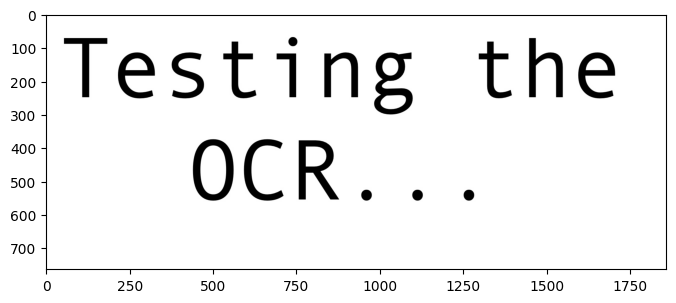

In [7]:
plt.figure(figsize=(8,6))
plt.imshow(rgb)
plt.show();

In [8]:
text = pytesseract.image_to_string(rgb)
text

'Testing the\nOCR...\n'

In [9]:
#Testing with Other language
img = cv2.imread("data/images/test02-02.jpg")

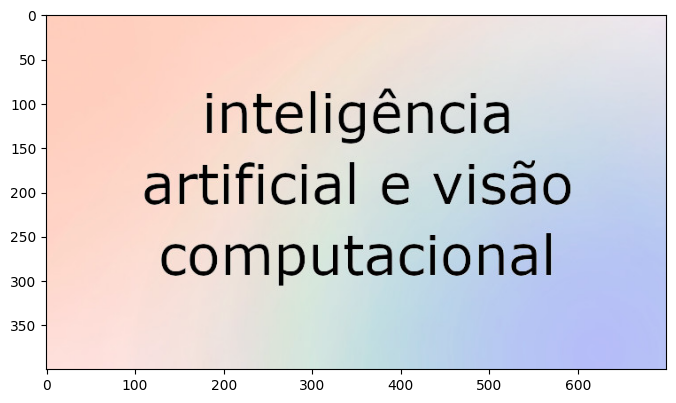

In [10]:
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.show()

In [11]:
def img_disply(rgb, x, y):
    plt.figure(figsize=(x,y))
    plt.imshow(rgb)
    plt.show()

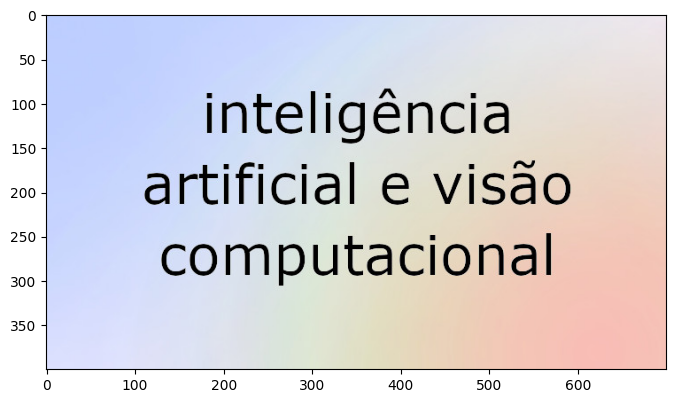

In [12]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disply(rgb, 8,6)

In [13]:
text = pytesseract.image_to_string(rgb)
text

'inteligéncia\nartificial e visao\ncomputacional\n'

In [14]:
# Check what are the language supported by the pytesseract library
#!tesseract --list-langs

In [15]:
# !apt-get install tesseract-ocr-por # Portuguese

In [16]:
text = pytesseract.image_to_string(rgb, lang="por")
text

'inteligência\nartificial e visão\ncomputacional\n'

In [17]:
!mkdir tessdata

A subdirectory or file tessdata already exists.


In [18]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(rgb, lang="por", config=config_tesseract)
text

'inteligência\nartificial e visão\ncomputacional\n'

In [19]:
config_tesseract = '--tessdata-dir tessdata'

In [144]:
#!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

In [145]:
!curl -LJO https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true -O eng.traineddata

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  1 22.3M    1  320k    0     0   183k      0  0:02:05  0:00:01  0:02:04  183k
 10 22.3M   10 2384k    0     0   841k      0  0:00:27  0:00:02  0:00:25 1898k
 18 22.3M   18 4352k    0     0  1161k      0  0:00:19  0:00:03  0:00:16 2016k
 26 22.3M   26 6128k    0     0  1290k      0  0:00:17  0:00:04  0:00:13 1936k
 34 22.3M   34 7952k    0     0  1383k      0  0:00:16  0:00:05  0:00:11 1908k
 41 22.3M   41 9616k    0     0  1425k      0  0:00:16  0:00:06  0:00:10 1859k
 50 22.3M   50 11.2M    0     0  1488k      0  0:

In [105]:
!ls tessdata/

'ls' is not recognized as an internal or external command,
operable program or batch file.


#### Parameter of pytesseract

#### Page Segmentation Mode

In [146]:
# !tesseract --help-psm

In [20]:
img = cv2.imread("data/images/page-book.jpg")

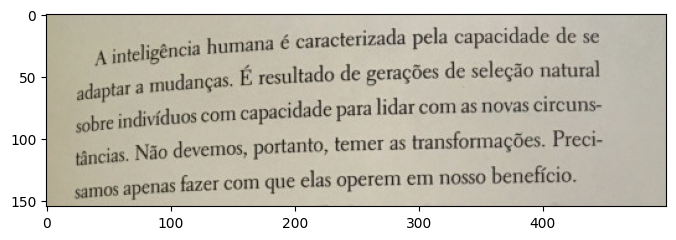

In [21]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disply(rgb, 8, 6)

In [22]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



In [23]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

ª%âªªââ%%%ã%â%âêâãgêªâª%%



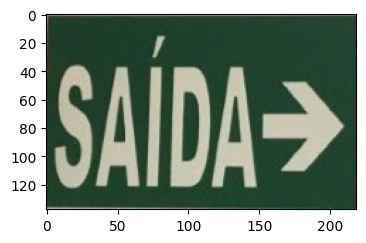

In [24]:
img = cv2.imread("data/images/exit.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disply(rgb, 4,3)

In [25]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

SAÍDA>



#### Page Orientation

In [26]:
from PIL import Image
img = Image.open("data/images/book01.jpg")

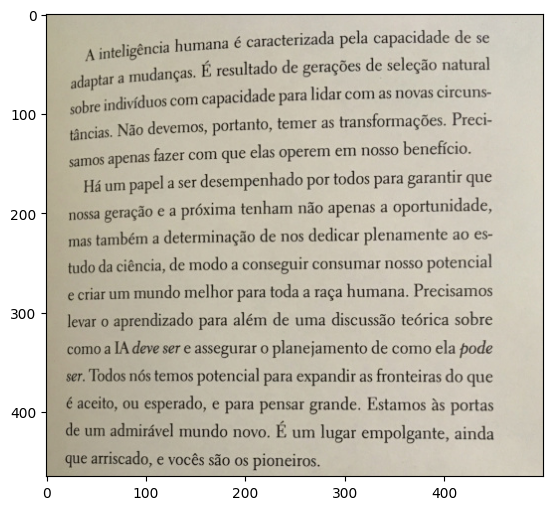

In [27]:
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.show()

In [28]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33



#### Selection of text

In [29]:
from pytesseract import Output

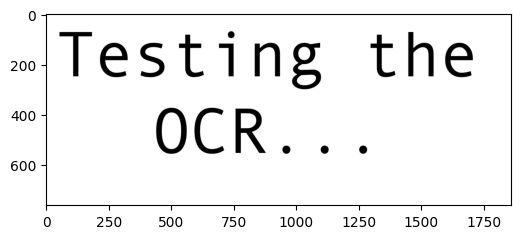

In [155]:
img = cv2.imread("data/images/test01.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disply(rgb, 6, 8)

In [156]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='eng', output_type = Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 1, 2],
 'left': [0, 54, 54, 54, 54, 1298, 441, 441, 1034],
 'top': [0, 69, 69, 69, 69, 72, 375, 370, 526],
 'width': [1859, 1652, 1652, 1652, 1046, 408, 843, 514, 240],
 'height': [763, 489, 489, 231, 231, 180, 183, 239, 32],
 'conf': [-1, -1, -1, -1, 86, 92, -1, 88, 92],
 'text': ['', '', '', '', 'Testing', 'the', '', 'OCR.', '..']}

In [157]:
result['text'], len(result['text'])

(['', '', '', '', 'Testing', 'the', '', 'OCR.', '..'], 9)

In [158]:
def bounding_box(result, img, i, color = (255, 100, 0)):
    x = result['left'][i]
    y = result['top'][i]
    w = result['width'][i]
    h = result['height'][i]
    
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    
    return x, y, img

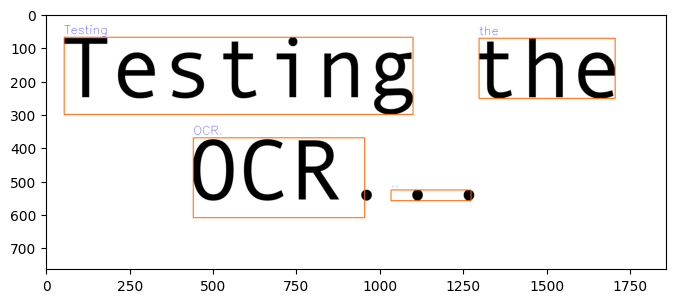

In [159]:
img_copy = rgb.copy()
min_confidence = 40
for i in range(0, len(result['text'])):
    #print(i)
    confidence = result['conf'][i]
    #print(confidence)
    if confidence > min_confidence:
        #print(confidence)
        x, y, img = bounding_box(result, img_copy, i)
        #print(x, y)
        text = result['text'][i]
        #This is the opencv function to change the image and draw the text in it 
        cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255))
        
plt.figure(figsize=(8,6))
plt.imshow(img_copy)
plt.show()

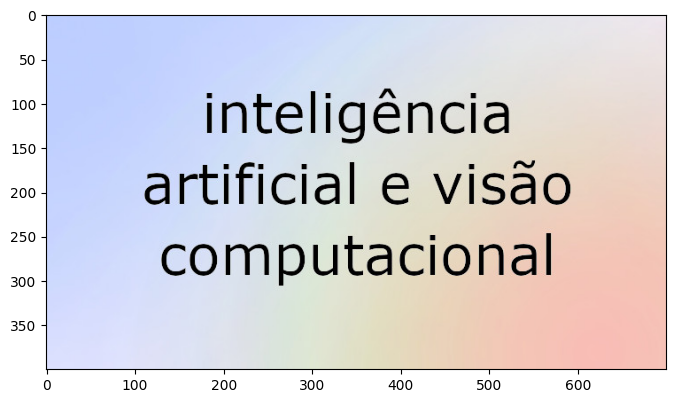

In [160]:
img = cv2.imread('data/images/test02-02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_disply(rgb, 8,6)

In [161]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'conf': [-1, -1, -1, -1, 91, -1, 88, 93, 91, -1, 90],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional']}

In [169]:
from PIL import ImageFont, ImageDraw, Image
font = 'data/Fonts/calibri.ttf'

In [190]:
def write_text(text, x, y, img, font, font_size=32):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    #its similar dunction like putText()
    draw.text((x, y - font_size), text, font=font)
    img = np.array(img_pil)
    return img

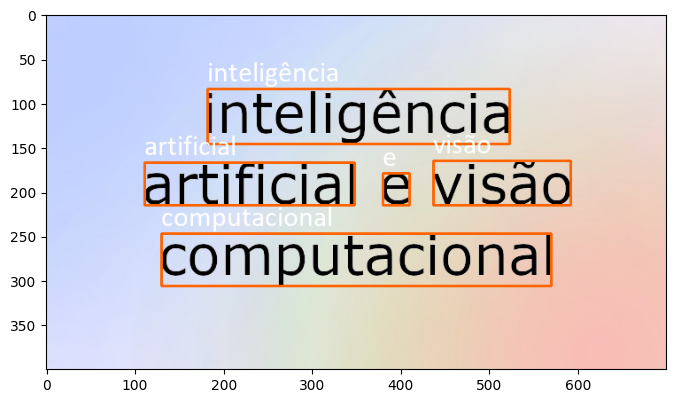

In [191]:
img_copy = rgb.copy()
min_confidence = 40
for i in range(0, len(result['text'])):
    confidence = result['conf'][i]
    if confidence > min_confidence:
        x, y, img = bounding_box(result, img_copy, i)
        text = result['text'][i]
        #cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255))
        img_copy = write_text(text, x, y, img_copy, font)
        
img_disply(img_copy, 8,6)

#### Searching specific information

In [192]:
import re

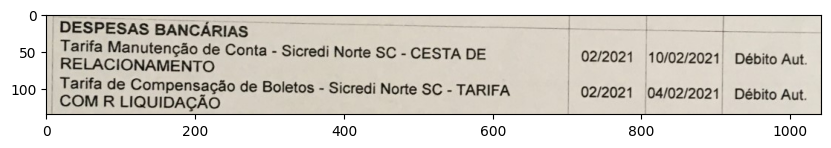

In [194]:
img = cv2.imread('data/images/table_test.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_disply(rgb, 10, 13)

In [197]:
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
result

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [204]:
# https://regexr.com/
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

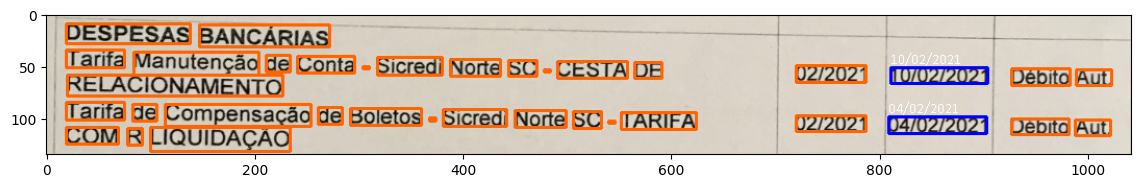

In [212]:
dates = []
img_copy = rgb.copy()
min_confidence = 40
for i in range(0, len(result['text'])):
    confidence = result['conf'][i]
    if confidence > min_confidence:
        text = result['text'][i]
        if re.match(date_pattern, text):
            x, y, img = bounding_box(result, img_copy, i, (0, 0, 255))
            #cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255))
            img_copy = write_text(text, x, y, img_copy, font, font_size=15)
            dates.append(text)
        else:
            x, y, img_copy = bounding_box(result, img_copy, i)
img_disply(img_copy, 14,7)

In [213]:
dates

['10/02/2021', '04/02/2021']

#### Detecting texts in natural scenarios

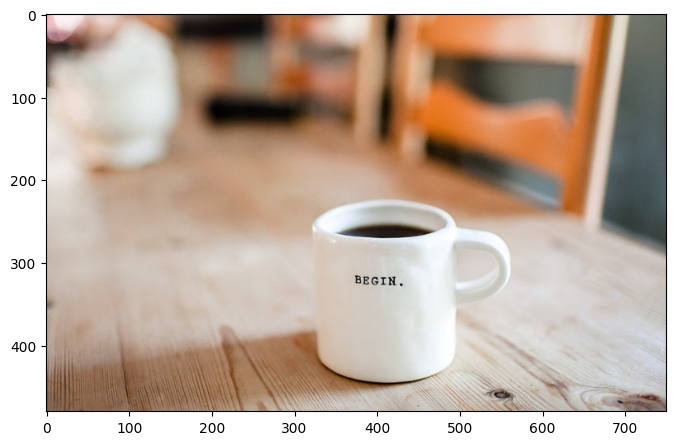

In [214]:
img = cv2.imread('data/images/cup.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_disply(rgb, 8, 6)

In [216]:
result = pytesseract.image_to_data(rgb, lang='eng', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
 'left': [0, 668, 668, 668, 668, 374, 374, 374, 374, 0, 0, 0, 0],
 'top': [0, 0, 0, 0, 0, 316, 316, 316, 316, 409, 409, 409, 409],
 'width': [750, 82, 82, 82, 82, 58, 58, 58, 58, 169, 169, 169, 169],
 'height': [480, 295, 295, 295, 295, 13, 13, 13, 13, 71, 71, 71, 71],
 'conf': [-1, -1, -1, -1, 95, -1, -1, -1, 74, -1, -1, -1, 95],
 'text': ['', '', '', '', ' ', '', '', '', 'BEGIN.', '', '', '', '']}

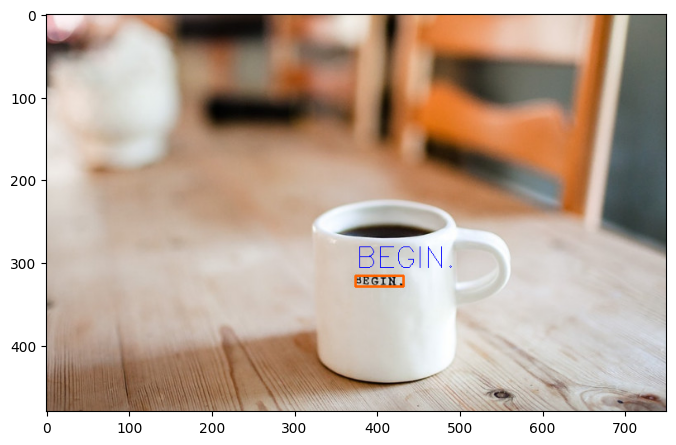

In [226]:
img_copy = rgb.copy()
min_confidence = 40
for i in range(0, len(result['text'])):
    confidence = result['conf'][i]
    if confidence > min_confidence:
        text = result['text'][i]
        if not text.isspace() and len(text)>0:
            x, y, img = bounding_box(result, img_copy, i)
            cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255))
        
img_disply(img_copy, 8,6)

In [218]:
result['conf']

[-1, -1, -1, -1, 95, -1, -1, -1, 74, -1, -1, -1, 95]

In [223]:
result['text']

['', '', '', '', ' ', '', '', '', 'BEGIN.', '', '', '', '']